### MLP for analytes classification using Keras
#### Edgar Acuna
#### June 2020

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
#loading the data
df1=pd.read_csv("c://onr2020/NRLset1_part1.csv",header=None)
df2=pd.read_csv("c://onr2020/NRLset1_part2.csv",header=None)
df3=pd.read_csv("c://onr2020/NRLset1_part3.csv",header=None)
df4=pd.read_csv("c://onr2020/NRLset1_part4.csv",header=None)
df5=pd.read_csv("c://onr2020/NRLset1_part5.csv",header=None)
df6=pd.read_csv("c://onr2020/NRLset1_part6.csv",header=None)
df7=pd.read_csv("c://onr2020/NRLset1_part7.csv",header=None)
df8=pd.read_csv("c://onr2020/NRLset1_part8.csv",header=None)
y=pd.read_csv("c://onr2020/labels.csv",header=None)

In [4]:
dfset1=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)
# Configuration options
feature_vector_length = 1701
num_classes = 18000
X_train, X_test, Y_train, Y_test = train_test_split(dfset1,y, test_size=0.3,random_state=0)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

Train dimension:
(12600, 1701)
Test dimension:
(5400, 1701)


In [5]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.3, input_shape=input_shape))
model.add(Dense(300, input_shape=input_shape, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (1701,)
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 1701)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               510600    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 18000)             1818000   
Total params: 2,358,700
Trainable params: 2,358,700
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_history=model.fit(X_train, Y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 10080 samples, validate on 2520 samples
Epoch 1/100
10080/10080 [==============================] - 15s 2ms/step - loss: 4.4428 - accuracy: 0.0236 - val_loss: 3.7832 - val_accuracy: 0.0230
Epoch 2/100
10080/10080 [==============================] - 15s 1ms/step - loss: 3.7250 - accuracy: 0.0309 - val_loss: 3.6937 - val_accuracy: 0.0317
Epoch 3/100
10080/10080 [==============================] - 15s 2ms/step - loss: 3.6880 - accuracy: 0.0333 - val_loss: 3.6694 - val_accuracy: 0.0361
Epoch 4/100
10080/10080 [==============================] - 15s 1ms/step - loss: 3.6346 - accuracy: 0.0415 - val_loss: 3.5463 - val_accuracy: 0.0496
Epoch 5/100
10080/10080 [==============================] - 15s 1ms/step - loss: 3.5640 - accuracy: 0.0548 - val_loss: 3.4663 - val_accuracy: 0.0651
Epoch 6/100
10080/10080 [==============================] - 15s 1ms/step - loss: 3.4885 - accuracy: 0.0665 - val_loss: 3.3352 - val_accuracy: 0.0909
Epoch 7/100
100

Epoch 54/100
10080/10080 [==============================] - 15s 1ms/step - loss: 1.9905 - accuracy: 0.4551 - val_loss: 1.5975 - val_accuracy: 0.6393
Epoch 55/100
10080/10080 [==============================] - 16s 2ms/step - loss: 1.9622 - accuracy: 0.4594 - val_loss: 1.5907 - val_accuracy: 0.6163 1s - loss: 1.9604 - accuracy: 0.45
Epoch 56/100
10080/10080 [==============================] - 16s 2ms/step - loss: 1.9724 - accuracy: 0.4606 - val_loss: 1.7002 - val_accuracy: 0.5444
Epoch 57/100
10080/10080 [==============================] - 16s 2ms/step - loss: 1.9814 - accuracy: 0.4562 - val_loss: 1.6305 - val_accuracy: 0.5889
Epoch 58/100
10080/10080 [==============================] - 15s 1ms/step - loss: 1.9749 - accuracy: 0.4564 - val_loss: 1.6216 - val_accuracy: 0.5833
Epoch 59/100
10080/10080 [==============================] - 15s 1ms/step - loss: 1.9638 - accuracy: 0.4580 - val_loss: 1.6372 - val_accuracy: 0.5762
Epoch 60/100
10080/10080 [==============================] - 15s 2ms/ste

In [7]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(test_results)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

5400/5400 [==============================] - 3s 533us/step
[1.5748953676223756, 0.6050000190734863]
Test results - Loss: 1.5748953676223756 - Accuracy: 0.6050000190734863%


### 2.  Classification of  some analytes

#### Analyte #18

In [7]:
labels=list(range(1,41))

In [8]:
yclass=y.copy()
yclass[yclass!=18]=0
yclass[yclass==18]=1
X_train, X_test, yclass_train, yclass_test = train_test_split(dfset1,yclass,test_size=0.3,random_state=0)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)
Y_train = to_categorical(yclass_train, num_classes)
Y_test = to_categorical(yclass_test, num_classes)

Train dimension:
(12600, 1701)
Test dimension:
(5400, 1701)


In [9]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.3, input_shape=input_shape))
model.add(Dense(400, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (1701,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 1701)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 400)               680800    
_________________________________________________________________
dense_5 (Dense)              (None, 50)                20050     
_________________________________________________________________
dense_6 (Dense)              (None, 18000)             918000    
Total params: 1,618,850
Trainable params: 1,618,850
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy(name="accuracy"), keras.metrics.Precision(name="precision"),keras.metrics.Recall(name="recall")])
baseline_history=model.fit(X_train, Y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Train on 10080 samples, validate on 2520 samples
Epoch 1/100
10080/10080 [==============================] - 15s 2ms/step - loss: 0.1352 - accuracy: 1.0000 - precision: 0.9755 - recall: 0.9755 - val_loss: 0.1090 - val_accuracy: 1.0000 - val_precision: 0.9806 - val_recall: 0.9806
Epoch 2/100
10080/10080 [==============================] - 15s 2ms/step - loss: 0.1317 - accuracy: 1.0000 - precision: 0.9764 - recall: 0.9759 - val_loss: 0.1098 - val_accuracy: 1.0000 - val_precision: 0.9810 - val_recall: 0.9810
Epoch 3/100
10080/10080 [==============================] - 15s 2ms/step - loss: 0.1310 - accuracy: 1.0000 - precision: 0.9753 - recall: 0.9751 - val_loss: 0.1276 - val_accuracy: 1.0000 - val_precision: 0.9786 - val_recall: 0.9786
Epoch 4/100
10080/10080 [==============================] - 16s 2ms/step - loss: 0.1233 - accuracy: 1.0000 - precision: 0.9750 - recall: 0.9744 - val_loss: 0.0812 - val_accuracy: 1.0000 - val_precision: 0.9790 - val_recall: 0.9790
Epoch 5/100
10080/10080 [======

10080/10080 [==============================] - 17s 2ms/step - loss: 0.0774 - accuracy: 1.0000 - precision: 0.9808 - recall: 0.9808 - val_loss: 0.0573 - val_accuracy: 1.0000 - val_precision: 0.9857 - val_recall: 0.9857
Epoch 72/100
10080/10080 [==============================] - 19s 2ms/step - loss: 0.0780 - accuracy: 1.0000 - precision: 0.9809 - recall: 0.9809 - val_loss: 0.0774 - val_accuracy: 1.0000 - val_precision: 0.9802 - val_recall: 0.9802
Epoch 73/100
10080/10080 [==============================] - 18s 2ms/step - loss: 0.0768 - accuracy: 1.0000 - precision: 0.9802 - recall: 0.9802 - val_loss: 0.0553 - val_accuracy: 1.0000 - val_precision: 0.9889 - val_recall: 0.9889
Epoch 74/100
10080/10080 [==============================] - 18s 2ms/step - loss: 0.0774 - accuracy: 1.0000 - precision: 0.9811 - recall: 0.9811 - val_loss: 0.0521 - val_accuracy: 1.0000 - val_precision: 0.9881 - val_recall: 0.9881
Epoch 75/100
10080/10080 [==============================] - 17s 2ms/step - loss: 0.0768 -

In [ ]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}% -Precision: {test_results[2]}% -Recall: {test_results[3]}%')

In [ ]:
#Function for plotting
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics =  ['loss', 'accuracy','precision','recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    else:
      plt.ylim([0,1])

    plt.legend()

In [ ]:
plot_metrics(baseline_history)

In [22]:
a=model.predict_classes(X_train,batch_size=200)

In [23]:
#Computing F1-score
train_features = np.array(X_train)
test_features = np.array(X_test)
train_labels=np.array(yclass_train)
test_labels=np.array(yclass_test)
train_predictions_baseline = model.predict_classes(train_features, batch_size=150)
f1_train=sklearn.metrics.f1_score(train_labels, train_predictions_baseline, average=None)
test_predictions_baseline = model.predict_classes(test_features, batch_size=150)
f1_test=sklearn.metrics.f1_score(test_labels, test_predictions_baseline, average=None)
print('f1_scores, training set',f1_train,'f1_scores in testing set',f1_test)

f1_scores, training set [0.99200581 0.54166667] f1_scores in testing set [0.99208294 0.55789474]


In [24]:
#The ROC curve
fp, tp, _ = sklearn.metrics.roc_curve(train_labels, train_predictions_baseline)
fp1, tp1, _ = sklearn.metrics.roc_curve(test_labels, test_predictions_baseline)
roc_auc = sklearn.metrics.auc(fp,tp)
roc_auc1 = sklearn.metrics.auc(fp1,tp1)

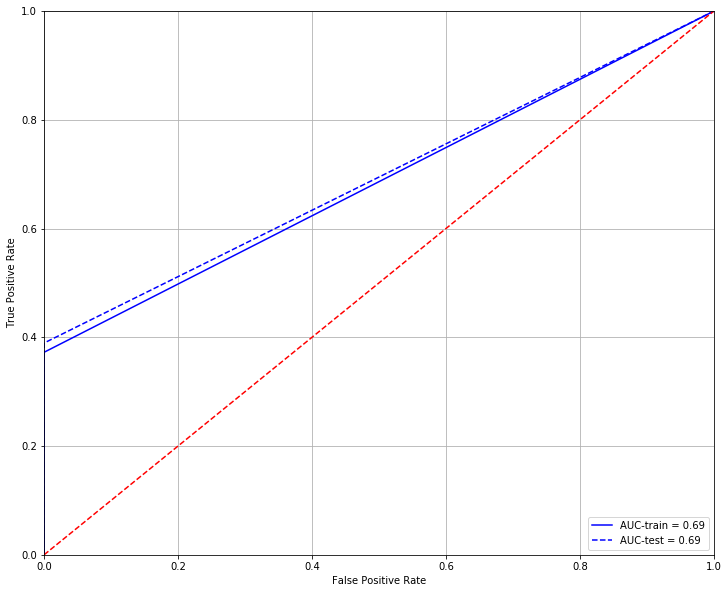

In [25]:
fig, ax = plt.subplots(1, 1)
ax.plot(fp, tp, 'b', label='AUC-train = %0.2f'% roc_auc)
ax.plot(fp1, tp1, 'b--', label='AUC-test = %0.2f'% roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

#### Analyte #24

In [ ]:
yclass=y.copy()
yclass[yclass!=24]=0
yclass[yclass==24]=1
X_train, X_test, yclass_train, yclass_test = train_test_split(dfset1,yclass,test_size=0.3,random_state=0)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)
Y_train = to_categorical(yclass_train, num_classes)
Y_test = to_categorical(yclass_test, num_classes)

In [26]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.3, input_shape=input_shape))
model.add(Dense(400, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (1701,)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 1701)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 400)               680800    
_________________________________________________________________
dense_8 (Dense)              (None, 50)                20050     
_________________________________________________________________
dense_9 (Dense)              (None, 18000)             918000    
Total params: 1,618,850
Trainable params: 1,618,850
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy(name="accuracy"), keras.metrics.Precision(name="precision"),keras.metrics.Recall(name="recall")])
baseline_history=model.fit(X_train, Y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Train on 10080 samples, validate on 2520 samples
Epoch 1/100
10080/10080 [==============================] - 17s 2ms/step - loss: 0.8985 - accuracy: 1.0000 - precision: 0.9738 - recall: 0.8754 - val_loss: 0.2606 - val_accuracy: 1.0000 - val_precision: 0.9786 - val_recall: 0.9782
Epoch 2/100
10080/10080 [==============================] - 15s 2ms/step - loss: 0.2810 - accuracy: 1.0000 - precision: 0.9743 - recall: 0.9716 - val_loss: 0.2099 - val_accuracy: 1.0000 - val_precision: 0.9786 - val_recall: 0.9778
Epoch 3/100
10080/10080 [==============================] - 15s 2ms/step - loss: 0.2211 - accuracy: 1.0000 - precision: 0.9742 - recall: 0.9734 - val_loss: 0.1668 - val_accuracy: 1.0000 - val_precision: 0.9786 - val_recall: 0.9786
Epoch 4/100
10080/10080 [==============================] - 15s 2ms/step - loss: 0.1870 - accuracy: 1.0000 - precision: 0.9735 - recall: 0.9735 - val_loss: 0.1750 - val_accuracy: 1.0000 - val_precision: 0.9786 - val_recall: 0.9786
Epoch 5/100
10080/10080 [======

10080/10080 [==============================] - 16s 2ms/step - loss: 0.0769 - accuracy: 1.0000 - precision: 0.9814 - recall: 0.9814 - val_loss: 0.0570 - val_accuracy: 1.0000 - val_precision: 0.9885 - val_recall: 0.9885
Epoch 72/100
10080/10080 [==============================] - 15s 2ms/step - loss: 0.0768 - accuracy: 1.0000 - precision: 0.9808 - recall: 0.9808 - val_loss: 0.0521 - val_accuracy: 1.0000 - val_precision: 0.9861 - val_recall: 0.9861
Epoch 73/100
10080/10080 [==============================] - 16s 2ms/step - loss: 0.0756 - accuracy: 1.0000 - precision: 0.9805 - recall: 0.9805 - val_loss: 0.0536 - val_accuracy: 1.0000 - val_precision: 0.9857 - val_recall: 0.9857
Epoch 74/100
10080/10080 [==============================] - 16s 2ms/step - loss: 0.0771 - accuracy: 1.0000 - precision: 0.9804 - recall: 0.9804 - val_loss: 0.0500 - val_accuracy: 1.0000 - val_precision: 0.9877 - val_recall: 0.9877
Epoch 75/100
10080/10080 [==============================] - 18s 2ms/step - loss: 0.0762 -

In [28]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}% -Precision: {test_results[2]}% -Recall: {test_results[3]}%')

5400/5400 [==============================] - 3s 547us/step
Test results - Loss: 0.06692275035988401 - Accuracy: 0.9999989867210388% -Precision: 0.9848148226737976% -Recall: 0.9848148226737976%


In [29]:
#Computing F1-score
train_features = np.array(X_train)
test_features = np.array(X_test)
train_labels=np.array(yclass_train)
test_labels=np.array(yclass_test)
train_predictions_baseline = model.predict_classes(train_features, batch_size=150)
f1_train=sklearn.metrics.f1_score(train_labels, train_predictions_baseline, average=None)
test_predictions_baseline = model.predict_classes(test_features, batch_size=150)
f1_test=sklearn.metrics.f1_score(test_labels, test_predictions_baseline, average=None)
print('f1_scores, training set',f1_train,'f1_scores in testing set',f1_test)

f1_scores, training set [0.99232695 0.56621005] f1_scores in testing set [0.99227144 0.56842105]
